In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

2060
47


In [3]:
# data_file_path

In [4]:
train_data_file_path[1414]

'../SE_train_processed\\AV-王诗雯-20220729(scale_up).fif'

In [5]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter,result
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
2055,1,1
2056,1,1
2057,1,1
2058,1,1


In [6]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter,result
0,3,1
1,2,1
2,2,1
3,1,1
4,1,1
5,4,1
6,4,1
7,2,1
8,3,1
9,4,1


In [7]:
#发作为1；未发作为0
y_train=[]
for i in range(df_train.shape[0]):
    if df_train.iloc[i,1]==1:
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in range(df_test.shape[0]):
    if df_test.iloc[i,1]==1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

2060
1025
47
42


In [8]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [9]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

16480


In [10]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

376


In [11]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [12]:
train_data_file_path

['../SE_train_processed\\AV-严聪慧-20220803(flip).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(jitter).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(original).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(scale_down).fif',
 '../SE_train_processed\\AV-严聪慧-20220803(scale_up).fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_1.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_10.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_11.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_12.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_13.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_14.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_15.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_16.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_17.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_18.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_flip_19.fif',
 '../SE_train_processed\\AV-严聪慧-20220803random_fl

In [13]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(original).fif) does not conf

Opening raw data file ../SE_train_processed\AV-严聪慧-20220805(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_process

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_1.fif) do

Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220824(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220826(sc

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(flip).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220824(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220824(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220824(scale_up).fif) does 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-余琛宇-20220422(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Op

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220615(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(flip).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-余琛宇-20220422(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-余琛宇-20220422(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-余琛宇-20220422(scale_down).fif) does no

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘汉悦-20220617(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘浩天-20220513(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-刘浩天-20220513(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Op

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-刘汉悦-20220617(scale_down).fif) does no

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220511(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-南添仁-20220513(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_34.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-南添仁-20220511(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-南添仁-20220511(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-南添仁-20220513(flip).fif) does not 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_36.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_37.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_38.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_39.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000

Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_40.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805random_flip_35.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805random_flip_36.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805random_flip_37.

Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴启洲-20220701(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-

Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220808random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220808random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220808random_flip_7.fif

Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220408random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_proces

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_37.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_38.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220408random_flip_30.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220408random_flip_31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220408random_flip_32.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_39.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_40.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-周博-20220415random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

Opening raw data file ../SE_train_processed\AV-夏帆-20220914(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220916(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220916(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220415random_flip_39.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220415random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-周博-20220415random_flip_40.fif)

Opening raw data file ../SE_train_processed\AV-夏帆-20220916(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220916(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220916(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220919(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220919(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220919(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220919(scale_dow

Ready.
Opening raw data file ../SE_train_processed\AV-夏帆-20220923random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-夏帆-20220916(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-夏帆-20220916(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-夏帆-20220916(scale_up).fif) does not

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220815(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220819(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220819(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220819(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-尤李心怡-20220819(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_20.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-尤李心怡-20220815(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-尤李心怡-20220815(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-尤李心怡-20220815(scale_up).fif) do

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_23.

Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220815random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Opening raw data file ../SE_train_processed\AV-林子幸-20220422(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-林子幸-20220422(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-林子幸-20220422(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220406(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220406(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220406(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220812(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220812(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220812(scale_down).fif) does not c

Opening raw data file ../SE_train_processed\AV-柯志祥-20220406(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220406(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220411(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220411(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220411(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220411(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-柯志祥-20220411(

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_26.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-柯志祥-20220406(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-柯志祥-20220406(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-柯志祥-20220411(flip).fif) does not 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-汪佳星-20220706random_flip_31.fif...
Isotrak not found
    Range : 0 ...

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-沈祺雨-20220518(jitter).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-汪佳星-20220706random_flip_26.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-汪佳星-20220706random_flip_27.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-汪佳星-20220706random_flip_28.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-沈祺雨-20220518(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-沈祺雨-20220518(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-沈祺雨-20220518(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-熊姗姗-20220706(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-沈祺雨-20220518(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-沈祺雨-20220518(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-沈祺雨-20220518(scale_up).fif) does 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200328(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王文珊-20200330(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...   

Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_17.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王文珊-20200328(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王文珊-20200328(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王文珊-20200330(flip).fif) does not 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王莹-20220422random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...  

Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_27.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王莹-20220422random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王莹-20220422random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王莹-20220422random_flip_2.fif)

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220722random_flip_32.fif...
Isotrak not found
    Range : 0 ...

Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220722random_flip_27.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220722random_flip_28.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220722random_flip_29.

Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727random_flip_30.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727random_flip_31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727random_flip_32.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_33.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_34.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_35.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_36.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-祁燕-20220413random_flip_37.fif...
Isotrak not found
    Range : 0 ... 4095

Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829(original).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祁燕-20220413random_flip_31.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祁燕-20220413random_flip_32.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-祁燕-20220413random_flip_33.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220829random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...  

Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220902(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220829(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220829(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220829random_flip_1.fif) do

Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-肖敏霞-20220905(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡望先-20220701(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡望先-20220701(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡望先-20220701(orig

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_19.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220905(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220905(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-肖敏霞-20220905(scale_down).fif) does no

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-胡杨-20220824random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...  

Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_25.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_26.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_27.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-胡杨-20220824random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-胡杨-20220824random_flip_20.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-胡杨-20220824random_flip_21.fif)

Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_28.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_29.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_30.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_31.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711random_flip_32.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_p

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220624(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-蔡淼-20220624(scale_up).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220711random_flip_28.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220711random_flip_29.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220711random_flip_3.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220420(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220420(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220420(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220420(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220420(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-裴瑞婷-20220422(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Open

Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-裴瑞婷-20220420(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-裴瑞婷-20220420(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-裴瑞婷-20220420(original).fif) does not conf

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220516(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220516(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220518(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220518(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220518(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-邵子健-20220518(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
x_train=np.array(x_train)
x_train.shape

(16480, 15, 512)

In [15]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\AV-习俊豪-20220525.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-习俊豪-20220530.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-习俊豪-20220606.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220715.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220718.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220720.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-付宇欣-20220722.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ... 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-习俊豪-20220525.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-习俊豪-20220530.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-习俊豪-20220606.fif) does not conform to MNE naming conventio

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-邓敏-20220608.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-邓敏-20220613.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-邓敏-20220615.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-魏平-20220427.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-魏平-20220429.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-魏平-20220509.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-魏平-2

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-邓敏-20220608.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-邓敏-20220613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16520\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-邓敏-20220615.fif) does not conform to MNE naming conventions.

In [16]:
x_test=np.array(x_test)
x_test.shape

(376, 15, 512)

In [17]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(16480, 2)

In [18]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(376, 2)

In [19]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape,x_test.shape)

(16480, 15, 512, 1) (376, 15, 512, 1)


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow import keras

In [21]:
def create_model():
    #模型1 CNN
    input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
    input2=tf.keras.layers.Input(shape=(2,))#刺激参数

    conv0=tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(input1)
    norm0=tf.keras.layers.BatchNormalization()(conv0)
    pool0=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm0)

    conv1=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(pool0)
    norm1=tf.keras.layers.BatchNormalization()(conv1)
    pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
    # drop1=tf.keras.layers.Dropout(0.1)(pool1)

    conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(pool1)
    norm2=tf.keras.layers.BatchNormalization()(conv2)
    pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm2)#32*128
    # drop2=tf.keras.layers.Dropout(0.2)(pool2)

    conv3=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(pool2)
    norm3=tf.keras.layers.BatchNormalization()(conv3)
    pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm3)#16*64

    conv4=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(pool3)
    norm4=tf.keras.layers.BatchNormalization()(conv4)
    pool4=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm4)#16*64
    drop4=tf.keras.layers.Dropout(0.5)(pool4)

    flatten1=tf.keras.layers.Flatten()(drop4)

    dense1=tf.keras.layers.Dense(64,activation='relu')(flatten1)
    dense2=tf.keras.layers.Dense(32,activation='relu')(dense1)


    dense3=tf.keras.layers.Dense(16,activation='relu')(input2)
    dense4=tf.keras.layers.Dense(32,activation='relu')(dense3)

    concatenate1=tf.keras.layers.Concatenate()([dense2,dense4])

    dense5=tf.keras.layers.Dense(32,activation='relu')(concatenate1)

    out=tf.keras.layers.Dense(1,activation='sigmoid')(dense5)

    # model=tf.keras.models.Model(inputs=input1,outputs=out)
    model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

    adam = tf.keras.optimizers.Adam(lr=0.00001)
    model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )
    return model

In [22]:
#     input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
#     input2=tf.keras.layers.Input(shape=(2,))#刺激参数

#     conv1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(input1)
#     norm1=tf.keras.layers.BatchNormalization()(conv1)
#     pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
#     drop1=tf.keras.layers.Dropout(0.2)(pool1)

#     reshape1=tf.keras.layers.Reshape((1,8,256,128))(drop1)
#     lstm1=tf.keras.layers.ConvLSTM2D(64,(3,3),return_sequences=True)(reshape1)
#     lstm2=tf.keras.layers.ConvLSTM2D(32,(3,3))(lstm1)
#     flatten1=tf.keras.layers.Flatten()(lstm2)
#     dense3=tf.keras.layers.Dense(10,activation='relu')(flatten1)

#     # reshape2=tf.keras.layers.Reshape((4*252,32))(lstm2)
#     dense1=tf.keras.layers.Dense(64,activation='relu')(input2)
#     dense2=tf.keras.layers.Dense(10,activation='relu')(dense1)
#     # reshape3=tf.keras.layers.Reshape((32,1))(dense2)
#     # mul1=tf.matmul(reshape2,reshape3)

#     concatenate1=tf.keras.layers.Concatenate()([dense3,dense2])

#     out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

#     model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [23]:
def create_model():
    #模型2 多通道CNN+LSTM
    input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
    input2=tf.keras.layers.Input(shape=(2,))#刺激参数
    
    conv0=tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(input1)
    norm0=tf.keras.layers.BatchNormalization()(conv0)
    pool0=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm0)

    conv1=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(pool0)
    norm1=tf.keras.layers.BatchNormalization()(conv1)
    pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
    # drop1=tf.keras.layers.Dropout(0.1)(pool1)

    conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(pool1)
    norm2=tf.keras.layers.BatchNormalization()(conv2)
    pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm2)#32*128
    # drop2=tf.keras.layers.Dropout(0.2)(pool2)

    conv3=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(pool2)
    norm3=tf.keras.layers.BatchNormalization()(conv3)
    pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm3)#16*64

    conv4=tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu')(pool3)
    norm4=tf.keras.layers.BatchNormalization()(conv4)
    pool4=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm4)#16*64
    drop4=tf.keras.layers.Dropout(0.5)(pool4)
    


    reshape1=tf.keras.layers.Reshape((1,16,256,1))(drop4)
    lstm1=tf.keras.layers.ConvLSTM2D(64,(3,3),return_sequences=True)(reshape1)
    lstm2=tf.keras.layers.ConvLSTM2D(32,(3,3))(lstm1)
    flatten1=tf.keras.layers.Flatten()(lstm2)
    dense3=tf.keras.layers.Dense(32,activation='relu')(flatten1)
    dense4=tf.keras.layers.Dense(16,activation='relu')(dense3)

    # reshape2=tf.keras.layers.Reshape((4*252,32))(lstm2)
    dense1=tf.keras.layers.Dense(32,activation='relu')(input2)
    dense2=tf.keras.layers.Dense(16,activation='relu')(dense1)
    # reshape3=tf.keras.layers.Reshape((32,1))(dense2)
    # mul1=tf.matmul(reshape2,reshape3)

    concatenate1=tf.keras.layers.Concatenate()([dense4,dense2])
    dense5=tf.keras.layers.Dense(16,activation='relu')(concatenate1)

    out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

    model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

    adam = tf.keras.optimizers.Adam(lr=0.00001)
    model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )
    return model

In [24]:
# #模型2
# input1=tf.keras.layers.Input(shape=(x_train.shape[1],1))#15通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数

# conv1=tf.keras.layers.Conv1D(32,3,padding='same',activation='relu')(input1)
# norm1=tf.keras.layers.BatchNormalization()(conv1)
# pool1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2,padding='same')(norm1)#64*256
# drop1=tf.keras.layers.Dropout(0.2)(pool1)

# # reshape1=tf.keras.layers.Reshape((32,8,256,2))(drop1)
# lstm1 = tf.keras.layers.LSTM(32,return_sequences=True)(drop1)
# lstm2=tf.keras.layers.LSTM(16)(lstm1)

# flatten1=tf.keras.layers.Flatten()(lstm2)

# dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

# concatenate1=tf.keras.layers.Concatenate()([dense1,input2])

# out=tf.keras.layers.Dense(1,activation='sigmoid')(concatenate1)

# model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [25]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 512, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 15, 512, 16)  160         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 15, 512, 16)  64         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
# tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

In [27]:
# #判断大概要训练多少轮
# model=create_model()
# #方便命名模型
# my_epochs=15
# my_batch_size=64
# my_validation_split=0.2
# # early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# # checkpoint = ModelCheckpoint('../model_save/CNN+LSTM+Dense/', monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
# history = model.fit([x_train,long_ECT_code], y_train, 
#                     batch_size = my_batch_size,
#                     epochs = my_epochs,
#                     verbose = 1
#                      ,validation_split = my_validation_split
#                    )

In [37]:
# param_grid = {'epochs': [1,2,3], 'batch_size': [32, 64, 128]}
# keras_model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)
# grid_search = GridSearchCV(keras_model, param_grid, cv=5,scoring='accuracy')
# grid_search.fit([x_train,long_ECT_code], y_train)
# # 输出最佳超参数和最佳性能
# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [32]:
k = 5
epochs=9
batch_size=64
kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# 保存每个模型的验证准确率
val_accuracies = []
models = []

# 进行K折交叉验证
for train_index, val_index in kfold.split(x_train, y_train):
    long_ECT_code_train_fold,long_ECT_code_val_fold=long_ECT_code[train_index],long_ECT_code[val_index]
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    model.fit([x_train_fold,long_ECT_code_train_fold], y_train_fold, epochs=epochs, batch_size=batch_size, verbose=1)
    models.append(model)

    _, accuracy = model.evaluate([x_val_fold,long_ECT_code_val_fold], y_val_fold)
    val_accuracies.append(accuracy)

# 计算并打印K折交叉验证的平均准确率
mean_val_accuracy = np.mean(val_accuracies)
print(val_accuracies)
print(f"Mean validation accuracy: {mean_val_accuracy:.4f}")

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/9
 16/206 [=>............................] - ETA: 12s - loss: 0.6931 - accuracy: 0.5566

KeyboardInterrupt: 

In [22]:
x_test=np.array(x_test)
y_test=np.array(y_test)
long_ECT_code_test = np.array(long_ECT_code_test)

In [40]:
# 创建自定义集成模型
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        probas = [model(inputs) for model in self.models]
        average_probas = tf.reduce_mean(probas, axis=0)
        return average_probas

# 初始化集成模型
ensemble_model = EnsembleModel([models[0], models[1],models[2],models[3],models[4]])

# 评估集成模型
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
ensemble_model.evaluate([x_test,long_ECT_code_test],y_test) 

IndexError: list index out of range

In [49]:
# ensemble_model = tf.keras.models.load_model('../model_save/CNN_11_64_0.859')
ensemble_model = tf.keras.models.load_model('../model_save/CNN_LSTM_7_64_0.8643')

In [50]:
loss,acc=ensemble_model.evaluate([x_test,long_ECT_code_test],y_test) 

12/12 [==============================] - 2s 81ms/step - loss: 0.4372 - accuracy: 0.8644


In [51]:
pre_value=ensemble_model.predict([x_test,long_ECT_code_test])
print(pre_value)

y_pre = []
for i in pre_value:
    if i > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

# 计算各个指标
accuracy = accuracy_score(y_test,y_pre)
precision = precision_score(y_test,y_pre)
recall = recall_score(y_test,y_pre)
F1_socre = f1_score(y_test,y_pre)
print(F1_socre,precision,recall,accuracy)

# 计算混淆矩阵
'''
标签\预测    0       1 
    0    0预测为0 0预测为1
    1    1预测为0 1预测为1
'''
confusion_matrix(y_test,y_pre)

12/12 [==============================] - 1s 80ms/step
[[0.9711447 ]
 [0.7635209 ]
 [0.94593686]
 [0.8429513 ]
 [0.6904757 ]
 [0.87745917]
 [0.9213786 ]
 [0.92375517]
 [0.27321023]
 [0.9371483 ]
 [0.9880619 ]
 [0.5696494 ]
 [0.602846  ]
 [0.6855553 ]
 [0.7611478 ]
 [0.7394985 ]
 [0.97474575]
 [0.96788645]
 [0.85108584]
 [0.9795688 ]
 [0.9240974 ]
 [0.8153747 ]
 [0.7735727 ]
 [0.95245874]
 [0.5505142 ]
 [0.98832244]
 [0.7230145 ]
 [0.60133237]
 [0.95182544]
 [0.8136358 ]
 [0.8027957 ]
 [0.9624151 ]
 [0.86824787]
 [0.8439897 ]
 [0.90350807]
 [0.77395463]
 [0.7639874 ]
 [0.35074165]
 [0.6609853 ]
 [0.48069412]
 [0.66879016]
 [0.9208416 ]
 [0.8635853 ]
 [0.78743535]
 [0.8559438 ]
 [0.92154235]
 [0.96138895]
 [0.7710792 ]
 [0.8199542 ]
 [0.5723816 ]
 [0.9607941 ]
 [0.9545584 ]
 [0.50998837]
 [0.93921584]
 [0.8627694 ]
 [0.78500044]
 [0.8791534 ]
 [0.6746884 ]
 [0.4604228 ]
 [0.7195615 ]
 [0.9927956 ]
 [0.6940125 ]
 [0.6763164 ]
 [0.90534896]
 [0.81870115]
 [0.83887833]
 [0.9364873 ]
 [0.9388

array([[  2,  38],
       [ 13, 323]], dtype=int64)

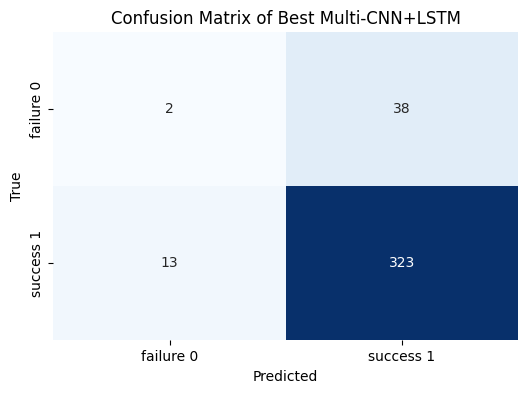

In [52]:
cm=confusion_matrix(y_test,y_pre)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['failure 0', 'success 1'], yticklabels=['failure 0', 'success 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Best Multi-CNN+LSTM")
plt.savefig("../img/best_Multi-CNN+LSTM_conf"".jpg")
# plt.savefig("../img/CNN_LSTMconf"+str(epochs)+'_'+str(batch_size)+'_'+str(acc)[:6]+".jpg")
plt.show()

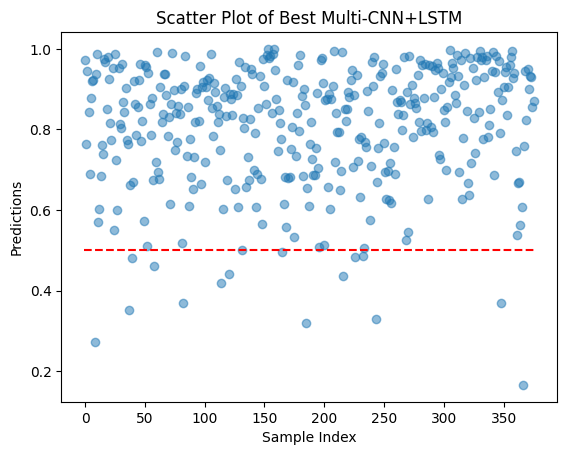

In [53]:
# 假设以下数据为模型预测输出和真实标签

# 绘制散点图
plt.scatter(range(len(pre_value)), pre_value, alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("Predictions")

# 为了更好地展示数据分布，可以添加一个对角线
plt.plot([-1,len(pre_value)], [0.5, 0.5], linestyle="--", color="red")
plt.title("Scatter Plot of Best Multi-CNN+LSTM")
plt.savefig("../img/best_Multi-CNN+LSTM_pred"+".jpg")
# plt.savefig("../img/CNN_LSTMpred"+str(epochs)+'_'+str(batch_size)+'_'+str(acc)[:6]+".jpg")

plt.show()

12/12 [==============================] - 1s 25ms/step


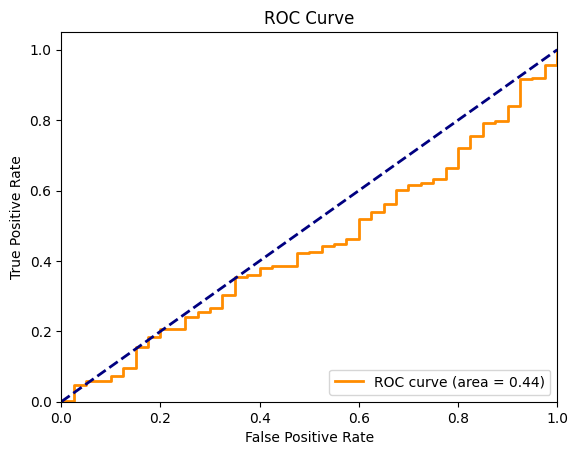

In [24]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('../model_save/CNN_11_64_0.859')
pre_value=model.predict([x_test,long_ECT_code_test])
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, pre_value)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [306]:
# train_result = ensemble_model.evaluate([x_train,long_ECT_code],y_train)

In [307]:
# # 使用模型集成进行预测
# ensemble_predictions = np.zeros((x_test.shape[0],1))

# for model in models:
#     ensemble_predictions += model.predict([x_test,long_ECT_code_test])

# ensemble_predictions /= k

# #查看结果
# print(ensemble_predictions)
# print(np.var(ensemble_predictions))

# # 将预测概率转换为类别标签
# for i in range(ensemble_predictions.shape[0]):
#     if ensemble_predictions[i]>0.5:
#         ensemble_predictions[i]=1
#     else:
#         ensemble_predictions[i]=0
        


# # 计算集成模型的准确率
# ensemble_accuracy = np.mean(ensemble_predictions == y_test)
# print(f"Ensemble accuracy: {ensemble_accuracy:.4f}")

# #计算各种指标和混淆矩阵
# accuracy = accuracy_score(y_test,ensemble_predictions)
# precision = precision_score(y_test,ensemble_predictions)
# recall = recall_score(y_test,ensemble_predictions)
# F1_socre = f1_score(y_test,ensemble_predictions)
# print(F1_socre,precision,recall,accuracy)
# # 计算混淆矩阵
# '''
# 标签\预测    0       1 
#     0    0预测为0 0预测为1
#     1    1预测为0 1预测为1
# '''
# confusion_matrix(y_test,ensemble_predictions)

In [308]:
# acc = history.history['accuracy']
# val_acc=history.history['val_accuracy']
# loss = history.history['loss']
# val_loss=history.history['val_loss']
# precision=history.history['precision']
# val_precision=history.history['val_precision']
# recall=history.history['recall']
# val_recall=history.history['val_recall']
# f1=[]
# for i in range(len(precision)):
#     f1.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
# val_f1=[]
# for i in range(len(val_precision)):
#     val_f1.append(2*val_precision[i]*val_recall[i]/(val_precision[i]+val_recall[i]))
# epochs = range(1, len(acc) + 1)

In [309]:
# import matplotlib.pyplot as plt
# plt.title('acc and val_acc')
# plt.plot(epochs, acc, 'red', label='training acc')
# plt.plot(epochs, val_acc, 'blue', label='validation acc')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Accuracy_ECT_16S.jpg")
# plt.show()

In [310]:
# plt.title('loss and val_loss')
# plt.plot(epochs, loss, 'red', label='loss')
# plt.plot(epochs, val_loss, 'blue', label='val_loss')
# plt.legend()
# plt.savefig("../img/Loss_ECT_16S.jpg")
# plt.show()

In [311]:
# model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
#            +'_'+'arch1'+'-'+str(test_result[1])[:5] + "_.h5")

In [312]:
# 保存集成模型
ensemble_model.save('../model_save/CNN_LSTM_'+str(epochs)+'_'+str(batch_size)+'_'+str(acc)[:6], save_format='tf')

INFO:tensorflow:Assets written to: ../model_save/CNN_LSTM_9_64_0.8510\assets


INFO:tensorflow:Assets written to: ../model_save/CNN_LSTM_9_64_0.8510\assets


In [189]:
# plt.title('precision and val_precision')
# plt.plot(epochs, precision, 'red', label='training precision')
# plt.plot(epochs, val_precision, 'blue', label='validation precision')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Precision_ECT_16S.jpg")
# plt.show()

In [37]:
# plt.title('recall and val_recall')
# plt.plot(epochs, recall, 'red', label='training recall')
# plt.plot(epochs, val_recall, 'blue', label='validation recall')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Recall_ECT_16S.jpg")
# plt.show()

In [38]:
# plt.title('f1 and val_f1')
# plt.plot(epochs, f1, 'red', label='training f1')
# plt.plot(epochs, val_f1, 'blue', label='validation f1')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/F1_ECT_16S.jpg")
# plt.show()

# 测试模型

In [28]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd
import scipy.signal
import scipy.io as scio  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [29]:
# loaded_model = tf.keras.models.load_model('../model_save/model_ECT+16s_64_2_0_0.87_.h5')

In [57]:
loaded_model = tf.keras.models.load_model('../model_save/ensemble_model_CNN_0.859')

In [31]:
#读取测试数据
data_dir_file=r"../SE_testdata_processed/"
testmodel_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(testmodel_data_file_path))

96


In [32]:
path = "../SE_parameter/testmodel_matched_stimulate_parameter.xlsx"
df_testmodel = pd.read_excel(path,engine='openpyxl')
df_testmodel=df_testmodel.drop(['Unnamed: 0'],axis=1)
df_testmodel

,parameter,result
0,1,1
1,4,1
2,3,1
3,2,1
4,3,1
...,...,...
91,2,1
92,1,1
93,4,1
94,2,1


In [34]:
#发作为1；未发作为0
y_testmodel=[]
for i in range(df_testmodel.shape[0]):
    if df_testmodel.iloc[i,1]==1:
        y_testmodel.append(1)
    else:
        y_testmodel.append(0)
print(len(y_testmodel))
print(sum(y_testmodel))

96
78


In [35]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16
samps=2
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_testmodel:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_testmodel=y_long_data
print(len(y_testmodel))

768


In [36]:
x_testmodel=[]
for i in testmodel_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_testmodel.append(data_temp)   

Opening raw data file ../SE_testdata_processed\AV-何富桂-20220221.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何富桂-20220225.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何富桂-20220228.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-何富桂-20220302.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-倪诗瑄-20220311.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-倪诗瑄-20220314.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-倪诗瑄-20220316.fif...
Isotrak not found
    Range : 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何富桂-20220221.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何富桂-20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-何富桂-20220228.fif) does not conform to MNE naming 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-曾刚-20220221.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-曾刚-20220223.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-李玉萍-20220216.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-李玉萍-20220218.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-李玉萍-20220221.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-李玉萍-20220223.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-曾刚-20220218.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-曾刚-20220221.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-曾刚-20220223.fif) does not conform to MNE naming con

Opening raw data file ../SE_testdata_processed\AV-雷震-20220328.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄盈雪-20220314.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄盈雪-20220316.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄盈雪-20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄盈雪-20220323.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄金燕-20220309.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_testdata_processed\AV-黄金燕-20220311.fif...
Isotrak not found
    Range : 0

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-雷震-20220328.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-黄盈雪-20220314.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_20136\411840215.py:3: RuntimeWarning: This filename (../SE_testdata_processed\AV-黄盈雪-20220316.fif) does not conform to MNE naming c

In [37]:
# 引入刺激参数
ECT_code = []

for i in range(df_testmodel.shape[0]):
    if df_testmodel.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_testmodel.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_testmodel.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_testmodel.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code_testmodel = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code_testmodel = np.array(long_ECT_code_testmodel)
long_ECT_code_testmodel.shape

(768, 2)

In [58]:
x_testmodel=np.array(x_testmodel)
x_testmodel=x_testmodel.reshape(x_testmodel.shape[0],x_testmodel.shape[1],x_testmodel.shape[2],1)
y_testmodel=np.array(y_testmodel)
long_ECT_code_testmodel = np.array(long_ECT_code_testmodel)
loss_,acc_ = loaded_model.evaluate([x_testmodel,long_ECT_code_testmodel],y_testmodel)

24/24 [==============================] - 1s 16ms/step - loss: 0.6005 - accuracy: 0.7826


In [59]:
pre_value = loaded_model.predict([x_testmodel,long_ECT_code_testmodel])
print(pre_value)

24/24 [==============================] - 0s 6ms/step
[[0.77537966]
 [0.6646675 ]
 [0.98045886]
 [0.78748757]
 [0.8014542 ]
 [0.8583498 ]
 [0.63539237]
 [0.8707074 ]
 [0.98663867]
 [0.70504874]
 [0.8782732 ]
 [0.97805834]
 [0.77370894]
 [0.8683667 ]
 [0.7842217 ]
 [0.87640506]
 [0.8278324 ]
 [0.89651424]
 [0.9983719 ]
 [0.95528907]
 [0.7435466 ]
 [0.8251718 ]
 [0.6886403 ]
 [0.5785543 ]
 [0.8503022 ]
 [0.9933039 ]
 [0.9316058 ]
 [0.9618786 ]
 [0.88805485]
 [0.88503665]
 [0.7925955 ]
 [0.99362135]
 [0.954322  ]
 [0.9890312 ]
 [0.8766915 ]
 [0.901344  ]
 [0.88799334]
 [0.38792676]
 [0.90752935]
 [0.96882087]
 [0.9785946 ]
 [0.9945424 ]
 [0.991739  ]
 [0.6044294 ]
 [0.8250087 ]
 [0.91639626]
 [0.8562663 ]
 [0.4996131 ]
 [0.99626637]
 [0.96018106]
 [0.85338175]
 [0.9407484 ]
 [0.9476372 ]
 [0.9827776 ]
 [0.55453336]
 [0.98184764]
 [0.81380147]
 [0.46625933]
 [0.94513017]
 [0.73891723]
 [0.71665347]
 [0.3489295 ]
 [0.89312124]
 [0.40414897]
 [0.9384078 ]
 [0.6931666 ]
 [0.61920464]
 [0.92555

In [60]:
y_pre = []
for i in pre_value:
    if i > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

# 计算各个指标
accuracy = accuracy_score(y_testmodel,y_pre)
precision = precision_score(y_testmodel,y_pre)
recall = recall_score(y_testmodel,y_pre)
F1_socre = f1_score(y_testmodel,y_pre)
print(F1_socre,precision,recall,accuracy)

# 计算混淆矩阵
'''
标签\预测    0       1 
    0    0预测为0 0预测为1
    1    1预测为0 1预测为1
'''
confusion_matrix(y_testmodel,y_pre)

0.8769344141488578 0.8117326057298773 0.9535256410256411 0.7825520833333334


array([[  6, 138],
       [ 29, 595]], dtype=int64)

# 无刺激参数测试

In [22]:
#去掉参数的模型3
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据

conv1=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.1)(pool1)

reshape1=tf.keras.layers.Reshape((1,8,256,128))(drop1)
lstm1=tf.keras.layers.ConvLSTM2D(64,(3,3),return_sequences=True)(reshape1)
lstm2=tf.keras.layers.ConvLSTM2D(32,(3,3))(reshape1)

flatten1=tf.keras.layers.Flatten()(lstm2)

dense1=tf.keras.layers.Dense(10,activation='relu')(flatten1)

out=tf.keras.layers.Dense(1,activation='sigmoid')(dense1)

model_wo_param=tf.keras.models.Model(inputs=input1,outputs=out)

In [23]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model_wo_param.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
#无刺激参数模型
my_epochs=2
my_batch_size=64
my_validation_split=0
history = model_wo_param.fit(x_train, y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1
                     ,validation_split = my_validation_split
                   )

Epoch 1/2
258/258 [==============================] - 570s 2s/step - loss: 0.3324 - accuracy: 0.8381
Epoch 2/2
258/258 [==============================] - 567s 2s/step - loss: 0.0487 - accuracy: 0.9897


In [25]:
train_result = model_wo_param.evaluate(x_train,y_train)

515/515 [==============================] - 118s 228ms/step - loss: 0.0236 - accuracy: 0.9954


In [40]:
x_test=np.array(x_test)
y_test=np.array(y_test)
test_result = model_wo_param.evaluate(x_test,y_test)

12/12 [==============================] - 2s 166ms/step - loss: 0.5329 - accuracy: 0.8856


In [46]:
pre_value = model_wo_param.predict(x_test)

12/12 [==============================] - 1s 89ms/step


In [47]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,confusion_matrix
y_pre = []
for i in pre_value:
    if i > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

# 计算各个指标
accuracy = accuracy_score(y_test,y_pre)
precision = precision_score(y_test,y_pre)
recall = recall_score(y_test,y_pre)
F1_socre = f1_score(y_test,y_pre)
print(F1_socre,precision,recall,accuracy)

# 计算混淆矩阵
'''
标签\预测    0       1 
    0    0预测为0 0预测为1
    1    1预测为0 1预测为1
'''
confusion_matrix(y_test,y_pre)

0.9393511988716502 0.8927613941018767 0.9910714285714286 0.8856382978723404


array([[  0,  40],
       [  3, 333]], dtype=int64)

In [35]:
x_testmodel=np.array(x_testmodel)
x_testmodel=x_testmodel.reshape(x_testmodel.shape[0],x_testmodel.shape[1],x_testmodel.shape[2],1)
y_testmodel=np.array(y_testmodel)
loss_,acc_ = model_wo_param.evaluate(x_testmodel,y_testmodel)  

24/24 [==============================] - 6s 259ms/step - loss: 1.4493 - accuracy: 0.7553


In [48]:
pre_value = model_wo_param.predict(x_testmodel)

24/24 [==============================] - 2s 89ms/step


In [49]:
y_pre = []
for i in pre_value:
    if i > 0.5:
        y_pre.append(1)
    else:
        y_pre.append(0)

# 计算各个指标
accuracy = accuracy_score(y_testmodel,y_pre)
precision = precision_score(y_testmodel,y_pre)
recall = recall_score(y_testmodel,y_pre)
F1_socre = f1_score(y_testmodel,y_pre)
print(F1_socre,precision,recall,accuracy)

# 计算混淆矩阵
'''
标签\预测    0       1 
    0    0预测为0 0预测为1
    1    1预测为0 1预测为1
'''
confusion_matrix(y_testmodel,y_pre)

0.8606060606060606 0.7888888888888889 0.9466666666666667 0.7553191489361702


array([[  0, 152],
       [ 32, 568]], dtype=int64)

In [39]:
model_wo_param.save('../model_save/model_wo_param_LSTM+CNN.h5')